# Problem Statement
## How can we predict the price of a diamond based on its characteristics?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import random

In [2]:
diamonddata = pd.read_csv('Diamond.csv')
diamonddata.head()

# Information about the Variables
display(diamonddata)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [3]:
print("Data type : ", type(diamonddata))
print("Data dims : ", diamonddata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (53943, 11)


In [4]:
#Data types of each variable
print(diamonddata.dtypes)

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object


In [5]:
diamonddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


## Data Cleaning

In [6]:
# Create a copy of the Dataset
diamonddata_clean = diamonddata.copy()

#Removal of UNNAMED Column
diamonddata_clean.drop('Unnamed: 0', axis =1, inplace=True)

# Convert all Variable Names to UPPERCASE
diamonddata_clean.columns = diamonddata_clean.columns.str.upper()

# Remove all spaces and dots from Variable Names
diamonddata_clean.columns = diamonddata_clean.columns.str.replace(".","")
diamonddata_clean.columns = diamonddata_clean.columns.str.replace(" ","_")

# Print the Variable Information to check
diamonddata_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CARAT    53943 non-null  float64
 1   CUT      53943 non-null  object 
 2   COLOR    53943 non-null  object 
 3   CLARITY  53943 non-null  object 
 4   DEPTH    53943 non-null  float64
 5   TABLE    53943 non-null  float64
 6   PRICE    53943 non-null  int64  
 7   X        53943 non-null  float64
 8   Y        53943 non-null  float64
 9   Z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


C:\Users\moham\AppData\Local\Temp\ipykernel_18764\899248166.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  diamonddata_clean.columns = diamonddata_clean.columns.str.replace(".","")


In [7]:
#Extraction of each variable from the dataset
carat = pd.DataFrame(diamonddata_clean['CARAT'])
cut = pd.DataFrame(diamonddata_clean['CUT'])
color = pd.DataFrame(diamonddata_clean['COLOR'])
clarity = pd.DataFrame(diamonddata_clean['CLARITY'])
depthpct = pd.DataFrame(diamonddata_clean['DEPTH'])
table = pd.DataFrame(diamonddata_clean['TABLE'])
price = pd.DataFrame(diamonddata_clean['PRICE'])
display(price)


##length = pd.DataFrame(diamonddata['x'])
##width = pd.DataFrame(diamonddata['y'])
##depth = pd.DataFrame(diamonddata['z'])

,PRICE
0,326
1,326
2,327
3,334
4,335
...,...
53938,2757
53939,2757
53940,2756
53941,2756


In [8]:
# Check missing values in data
diamonddata_clean.isnull().sum()

CARAT      0
CUT        0
COLOR      0
CLARITY    0
DEPTH      0
TABLE      0
PRICE      0
X          0
Y          0
Z          0
dtype: int64

There are no missing values in the data

In [9]:
# Check the Clean Dataset
diamonddata_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CARAT    53943 non-null  float64
 1   CUT      53943 non-null  object 
 2   COLOR    53943 non-null  object 
 3   CLARITY  53943 non-null  object 
 4   DEPTH    53943 non-null  float64
 5   TABLE    53943 non-null  float64
 6   PRICE    53943 non-null  int64  
 7   X        53943 non-null  float64
 8   Y        53943 non-null  float64
 9   Z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


## Exploratory Data Analysis/Visualisation

### Analysis of Numerical Variables

In [10]:
diamondnumdata = pd.DataFrame(diamonddata_clean[['CARAT', 'DEPTH', 'TABLE']])

In [11]:
diamondnumdata.describe()

,CARAT,DEPTH,TABLE
count,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251
std,0.473999,1.432626,2.234549
min,0.200000,43.000000,43.000000
25%,0.400000,61.000000,56.000000
50%,0.700000,61.800000,57.000000
75%,1.040000,62.500000,59.000000
max,5.010000,79.000000,95.000000


In [12]:
price.describe()

,PRICE
count,53943.000000
mean,3932.734294
std,3989.338447
min,326.000000
25%,950.000000
50%,2401.000000
75%,5324.000000
max,18823.000000


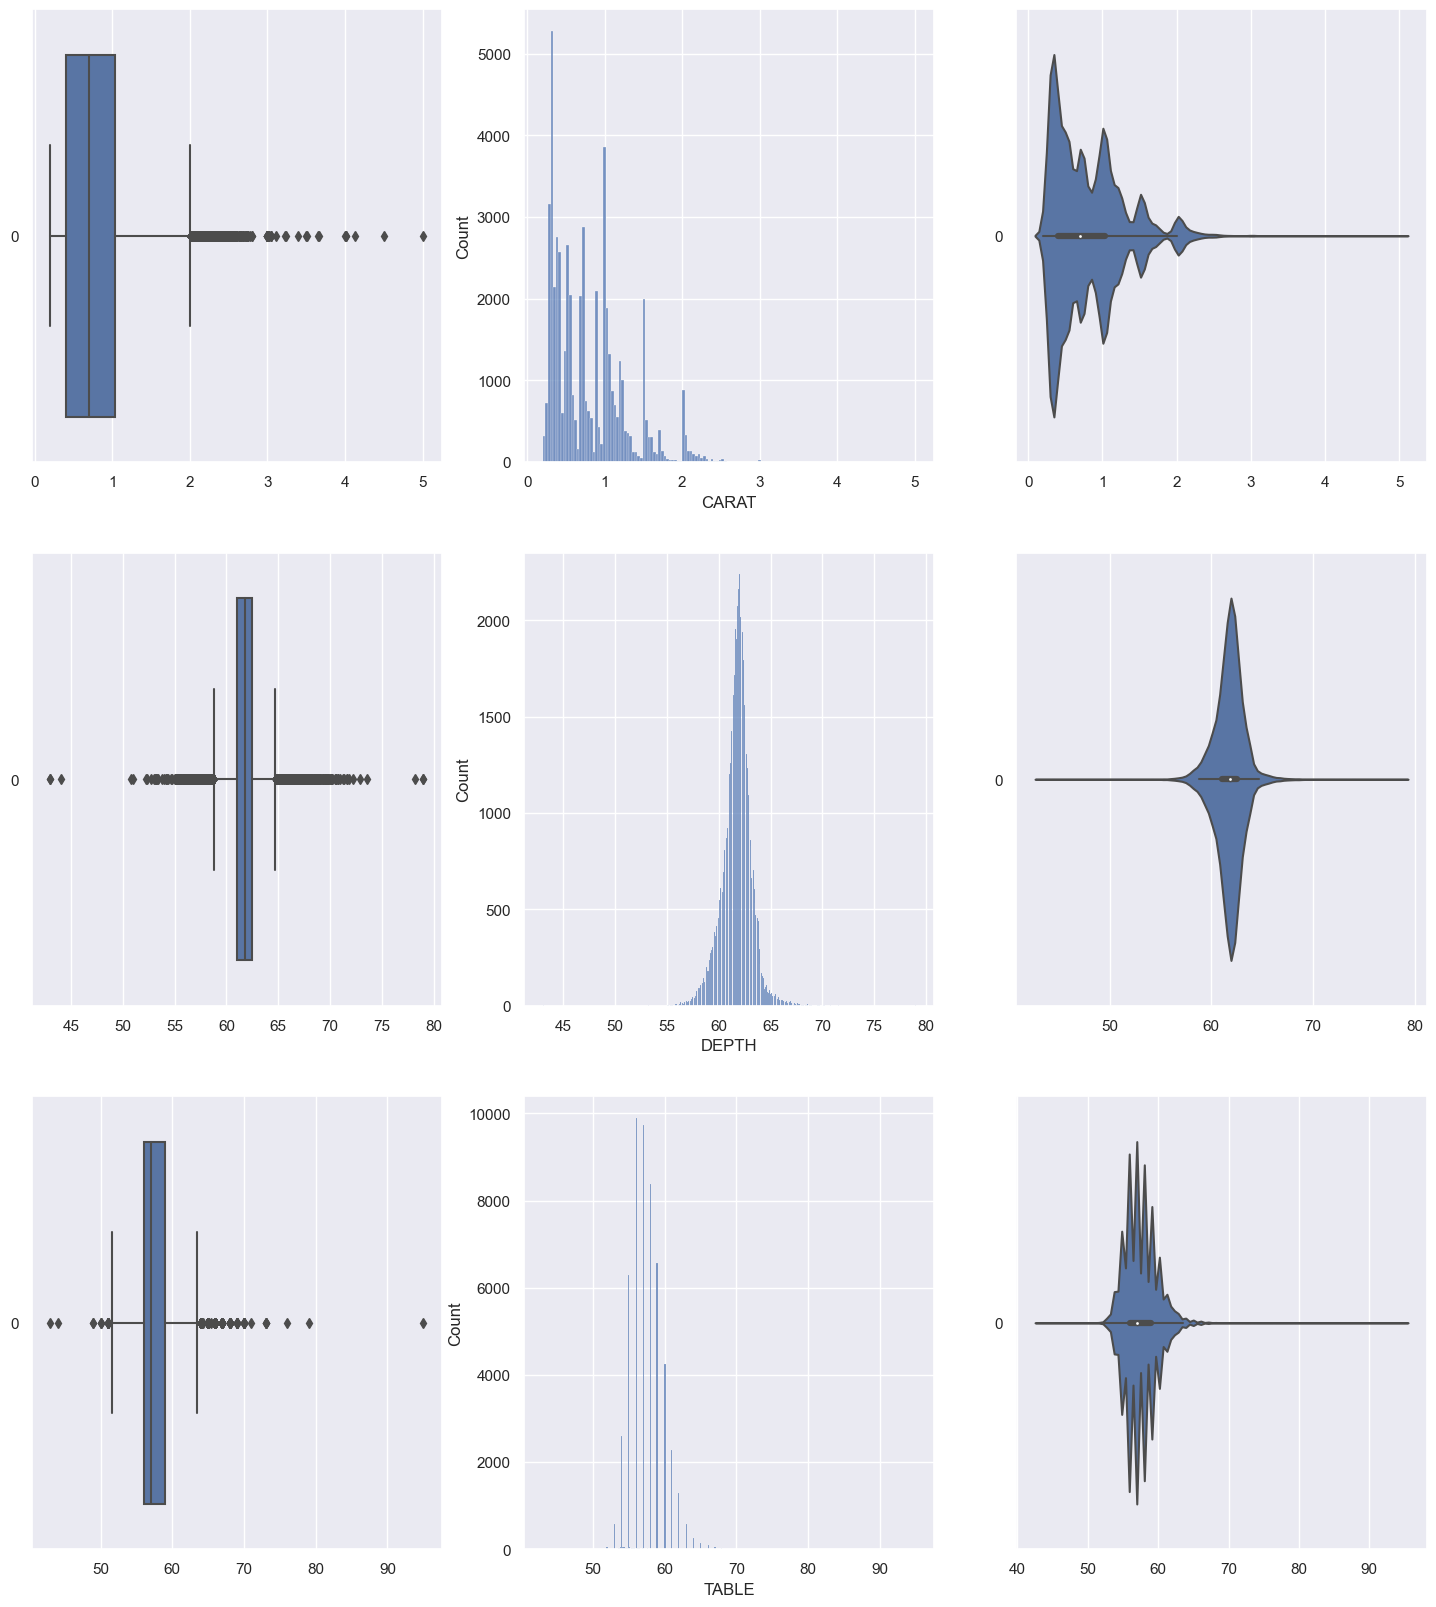

In [13]:
# Draw the distributions of all variables
f, axes = plt.subplots(3, 3, figsize=(18, 20))

count = 0
for var in diamondnumdata:
    sb.boxplot(data = diamondnumdata[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = diamondnumdata[var], ax = axes[count,1])
    sb.violinplot(data = diamondnumdata[var], orient = "h", ax = axes[count,2])
    count += 1

At first glance, Table has the least number of outliers, and Depth has the minimum skewness. 

In [14]:
# Calculate the quartiles
Q1 = diamondnumdata.quantile(0.25)
Q3 = diamondnumdata.quantile(0.75)

# Rule to identify outliers
rule = ((diamondnumdata < (Q1 - 1.5 * (Q3 - Q1))) | (diamondnumdata > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

CARAT    1889
DEPTH    2545
TABLE     605
dtype: int64

Our guess from before is correct where Table has the least number of outliers. Depth has the highest number of outliers.

In [15]:
diamondnumdata.skew()

CARAT    1.116705
DEPTH   -0.082187
TABLE    0.796836
dtype: float64

Our guess from the histograms and KDE was correct with depth having minimum skewness, while Table has is moderately skewed and Carat is highly skewed. 

          CARAT     DEPTH     TABLE     PRICE
CARAT  1.000000  0.028234  0.181602  0.921591
DEPTH  0.028234  1.000000 -0.295798 -0.010630
TABLE  0.181602 -0.295798  1.000000  0.127118
PRICE  0.921591 -0.010630  0.127118  1.000000


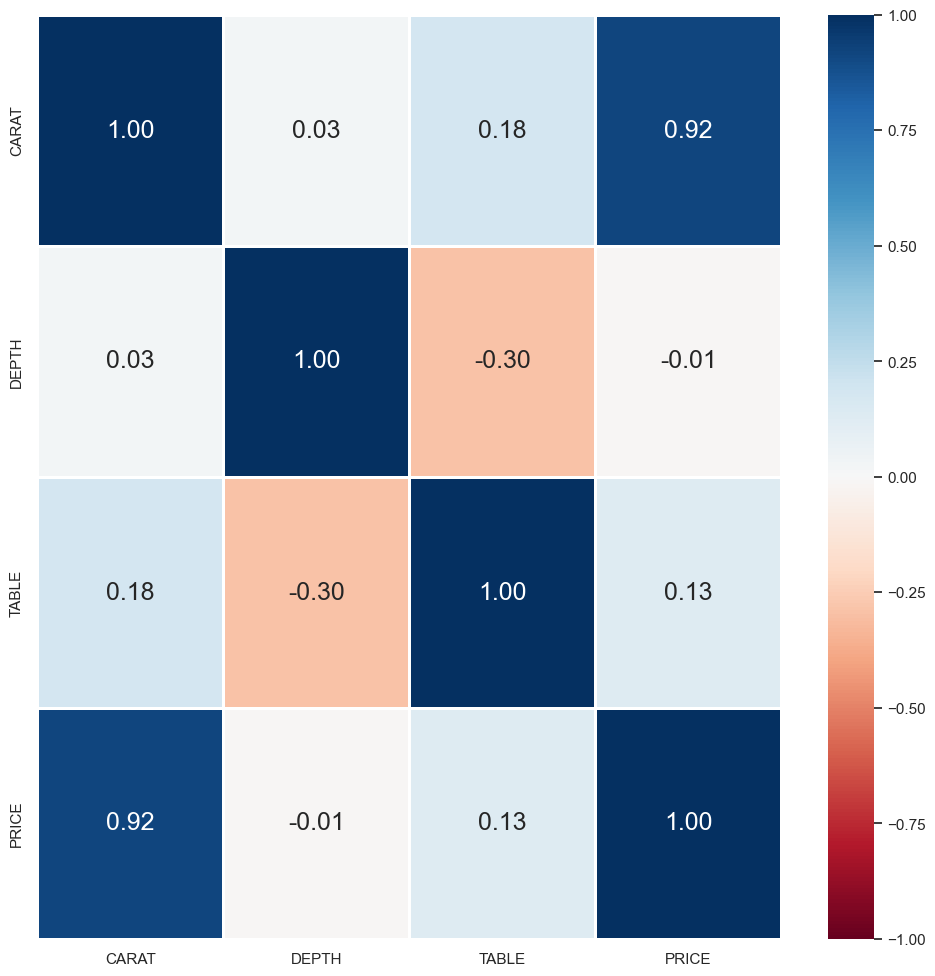

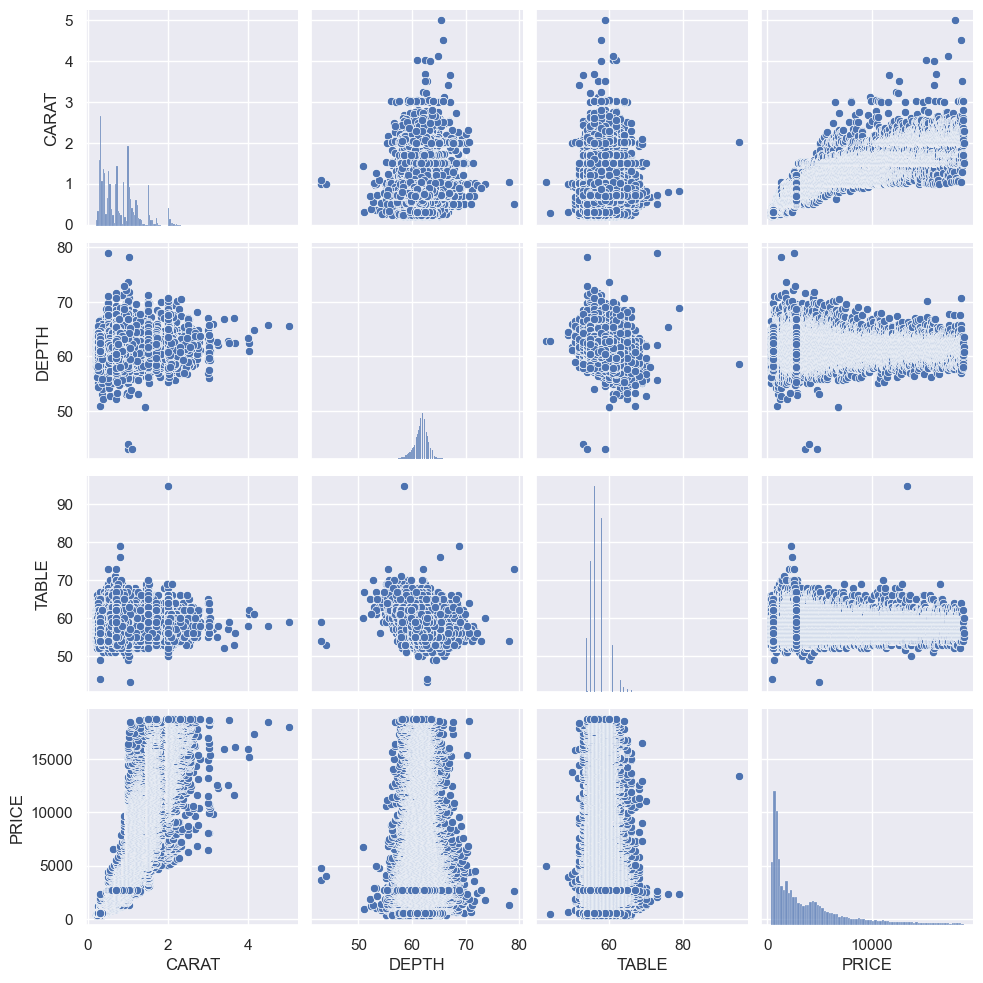

In [16]:
# Add Price to the dataframe
diamondnumdata = pd.concat([diamondnumdata, diamonddata_clean["PRICE"]], axis = 1).reindex(diamondnumdata.index)

# Correlation Matrix
print(diamondnumdata.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(diamondnumdata.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

# Draw pairs of variables against one another
sb.pairplot(data = diamondnumdata)

Carat : Possibly the most important variable : Highest Correlation, Strong Linearity
Depth and Table : Doesn't seem so important as a variable : Low or Almost no Correlation, Weak Linear Relation

We would pick Carat as the best variable in predicting the price of a diamond

## Use of Machine Learning Techniques

### Predicting Price (of diamond) using Carat

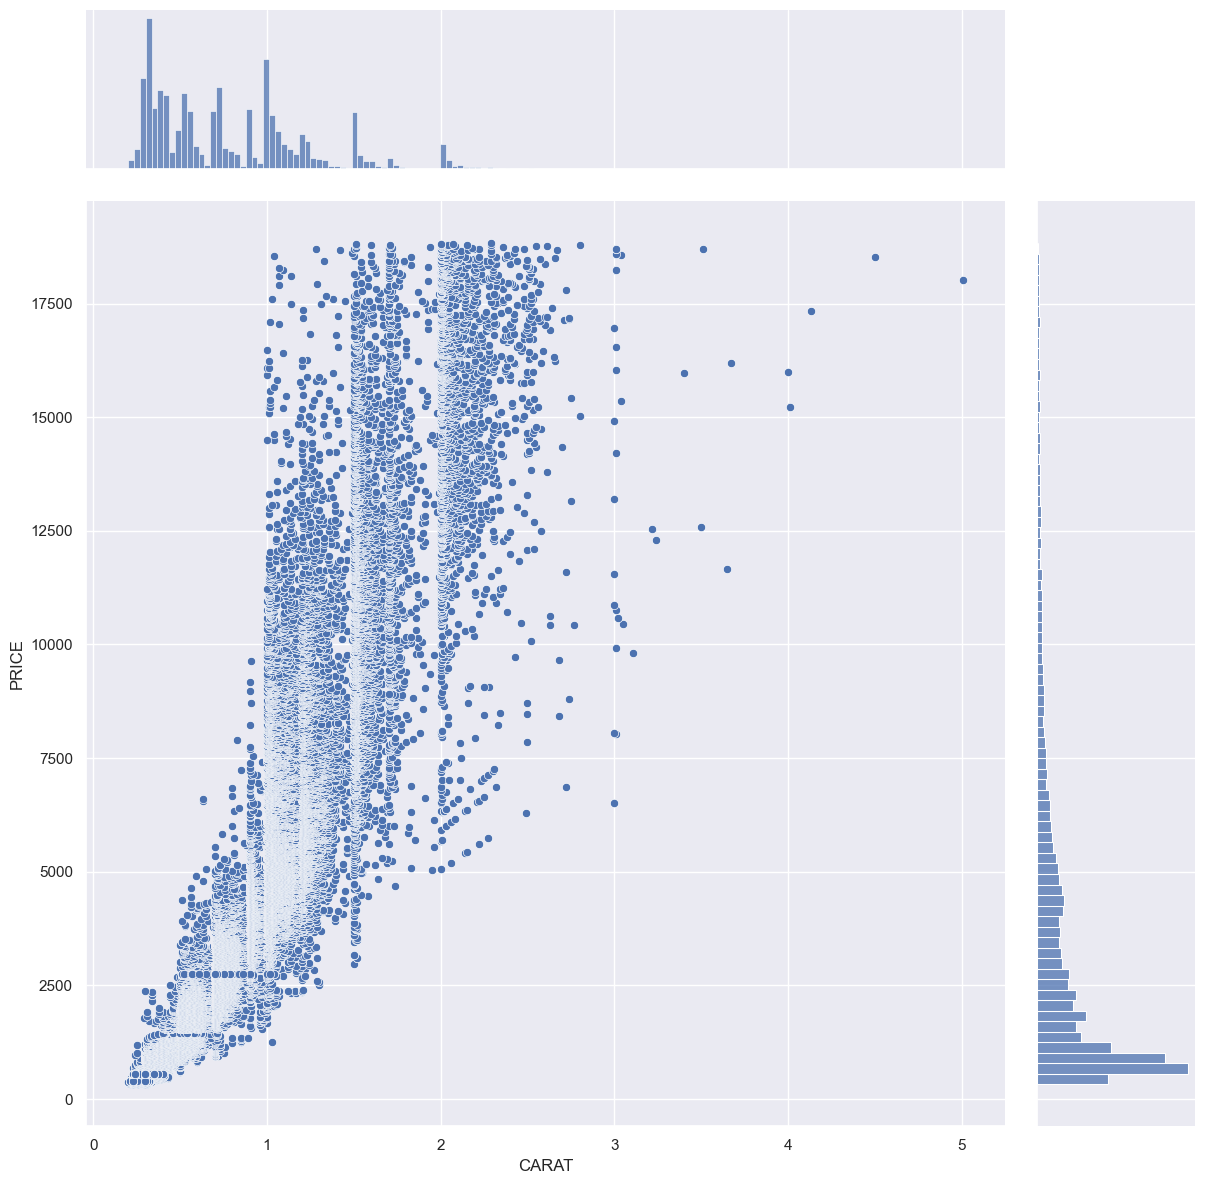

In [17]:
sb.jointplot(data = diamonddata_clean, x = "CARAT", y = "PRICE", height = 12)

In [18]:
diamonddata_clean.PRICE.corr(diamonddata_clean.CARAT)

0.9215912778016113

## Using Linear Regression Model

In [19]:
# Create a Linear Regression object
linreg = LinearRegression()

In [20]:
# Create a random seed
random.seed(1)
print(random.randint(1,1000))

138


In [21]:
# Extract Response and Predictors
y = pd.DataFrame(diamonddata_clean['PRICE'])
X = pd.DataFrame(diamonddata_clean['CARAT'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 138)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (43154, 1) (43154, 1)
Test Set  : (10789, 1) (10789, 1)


In [22]:
linreg.fit(X_train, y_train)

LinearRegression()

In [23]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [-2263.90712025]
Coefficients 	: a =  [[7763.37046972]]


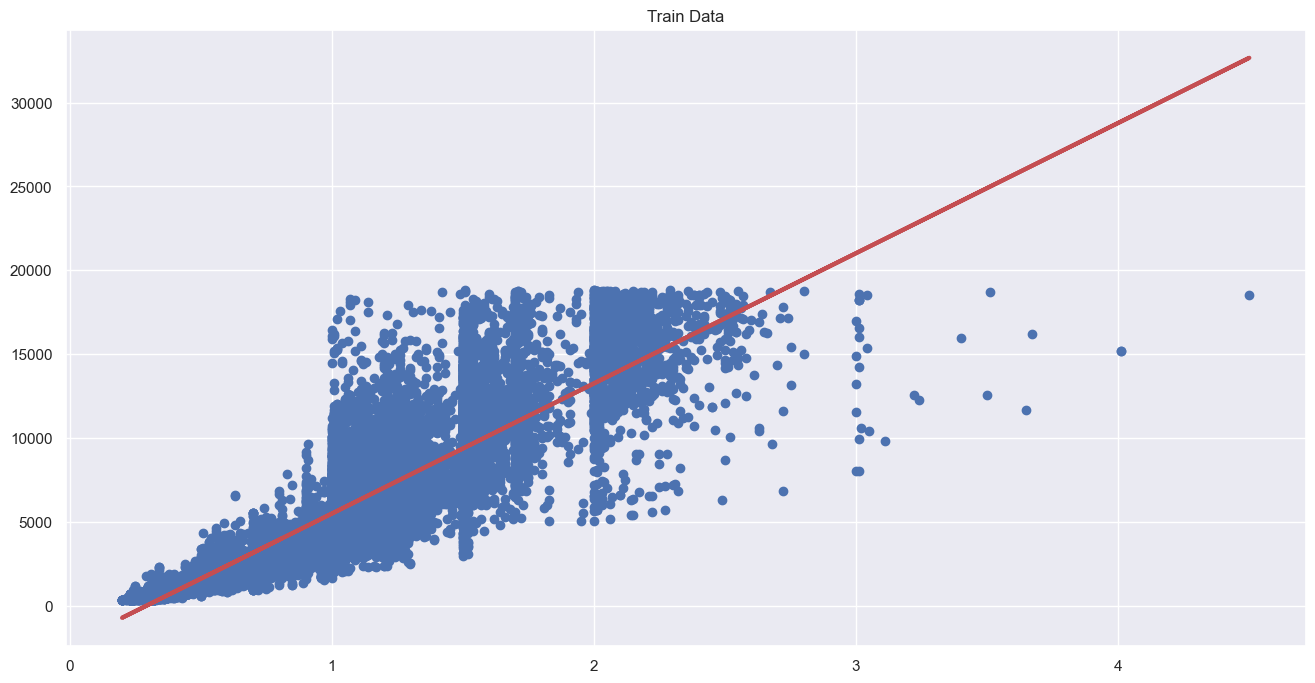

Explained Variance (R^2) 	: 0.8486179377482752
Mean Squared Error (MSE) 	: 2398890.660974258
Root Mean Squared Error (RMSE) 	: 1548.8352594689527


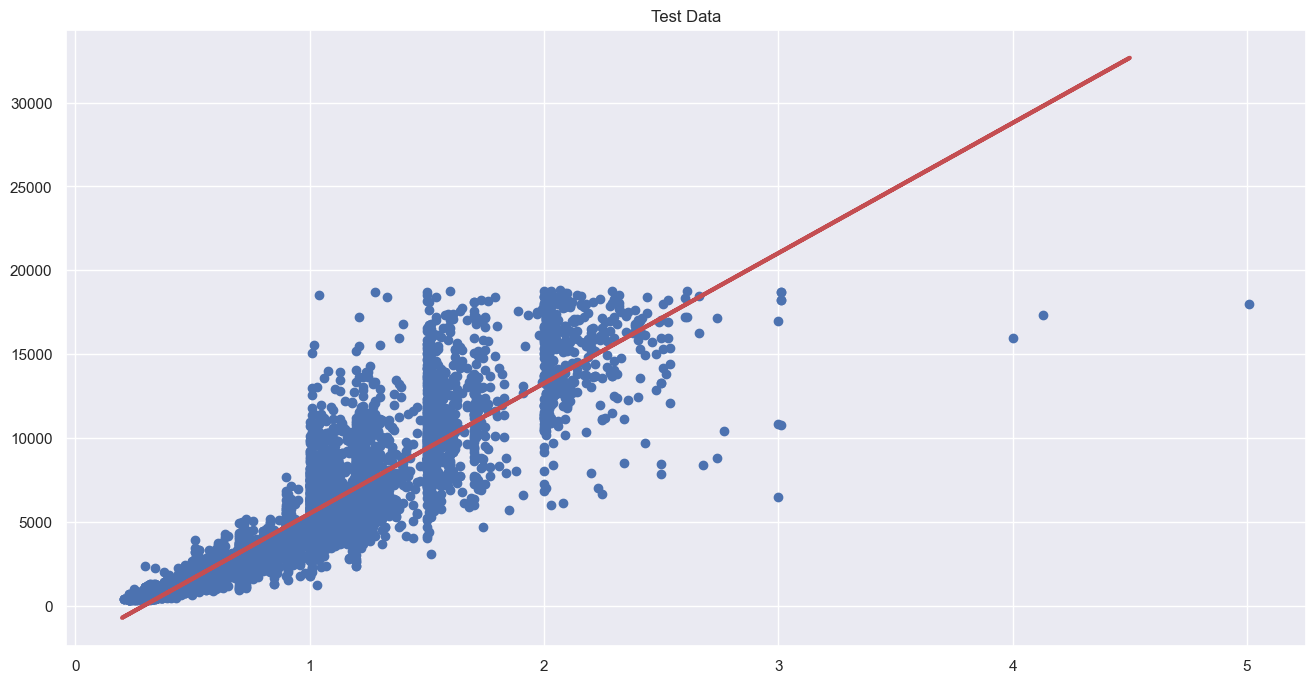

Explained Variance (R^2) 	: 0.8521152579253212
Mean Squared Error (MSE) 	: 2393681.009910226
Root Mean Squared Error (RMSE) 	: 1547.152549010674


In [24]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.title("Train Data")
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

# Compute RMSE on the train set
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))

# Predict Price values corresponding to Carat
y_test_pred = linreg.predict(X_test)

# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.title("Test Data")
plt.scatter(X_test, y_test)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))

# Compute MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

# Compute RMSE on the test set
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

### Since explained variance(R^2) is relatively high(near to 1), it shows that CARAT is a good predictor for a price of a diamond

### Remove the outliers

          CARAT     DEPTH     TABLE     PRICE
CARAT  1.000000  0.035863  0.187413  0.922878
DEPTH  0.035863  1.000000 -0.240084  0.006132
TABLE  0.187413 -0.240084  1.000000  0.136754
PRICE  0.922878  0.006132  0.136754  1.000000


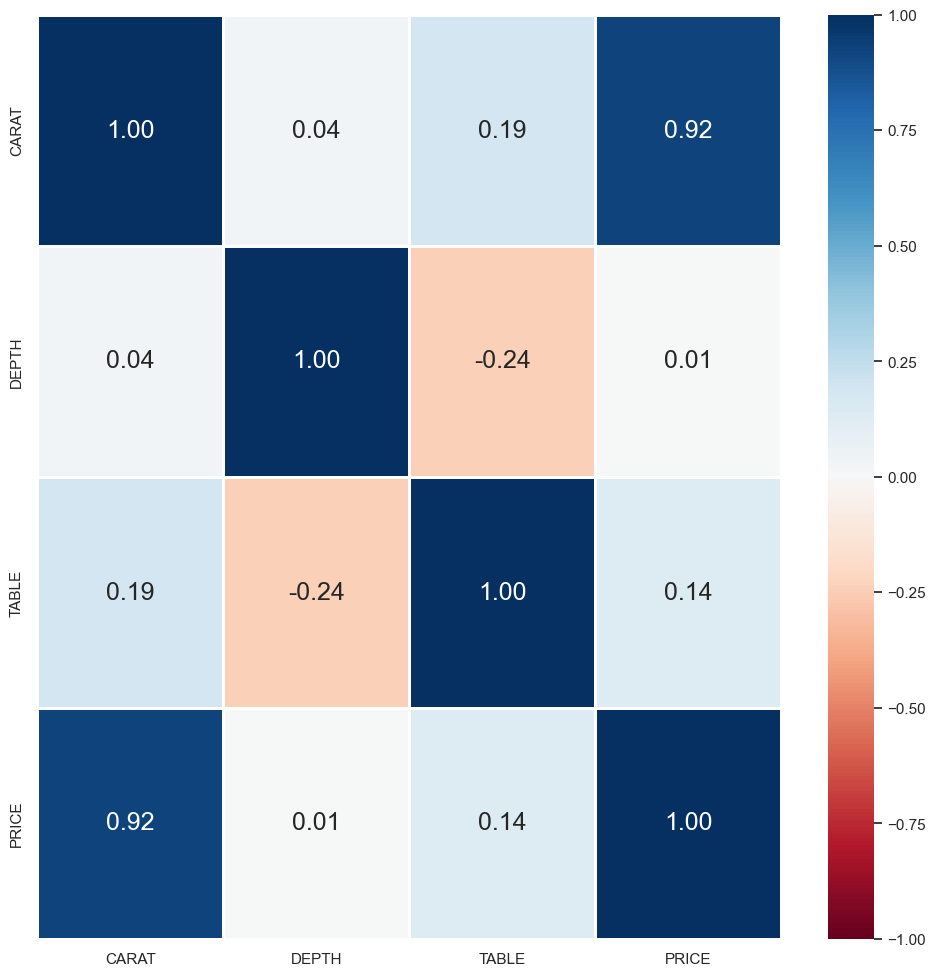

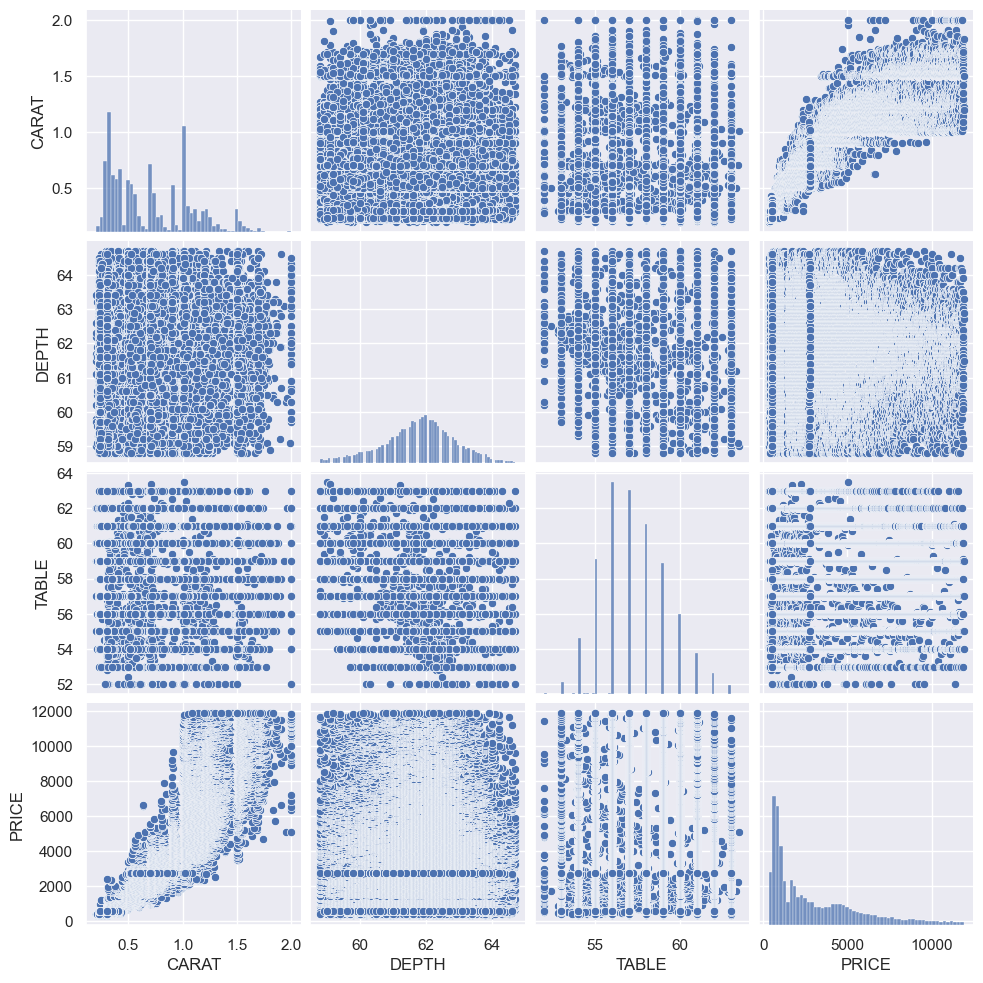

In [25]:
# Extract the  variables for simplicity
diamondtarget = diamondnumdata.copy()
# Make a clean "copy" and not just a slice of the dataset

# Calculate the quartiles
Q1 = diamondtarget.quantile(0.25)
Q3 = diamondtarget.quantile(0.75)

# Rule to identify outliers
rule = ((diamondtarget < (Q1 - 1.5 * (Q3 - Q1))) | (diamondtarget > (Q3 + 1.5 * (Q3 - Q1))))

# Check the dataframe rule
rule

# Find the rows where ANY column is True
outliers = rule.any(axis = 1)   # axis 0 is row, 1 is column

# Check the outliers -- it's a boolean Series
outliers

# Which row indices correspond to outliers in the dataframe?
outlierindices = outliers.index[outliers == True]
outlierindices

# Remove the outliers based on the row indices obtained above
diamondtarget.drop(axis = 0,               # 0 drops row 1 drops column
                   index = outlierindices, # this takes a list as input
                   inplace = True)         # not overwritten by default 

# Check the clean data
diamondtarget

# Correlation Matrix
print(diamondtarget.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(diamondtarget.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

# Draw pairs of variables against one another
sb.pairplot(data = diamondtarget)

### After removing the outliers, the explained variance remain approximately the same but there was a significant decrease in RMSE. Hence, we feel that removing outliers will greatly improve the results we obtained from our data set. 

Train Set : (38032, 1) (38032, 1)
Test Set  : (9508, 1) (9508, 1)
Intercept 	: b =  [-1738.96191388]
Coefficients 	: a =  [[6836.79495043]]


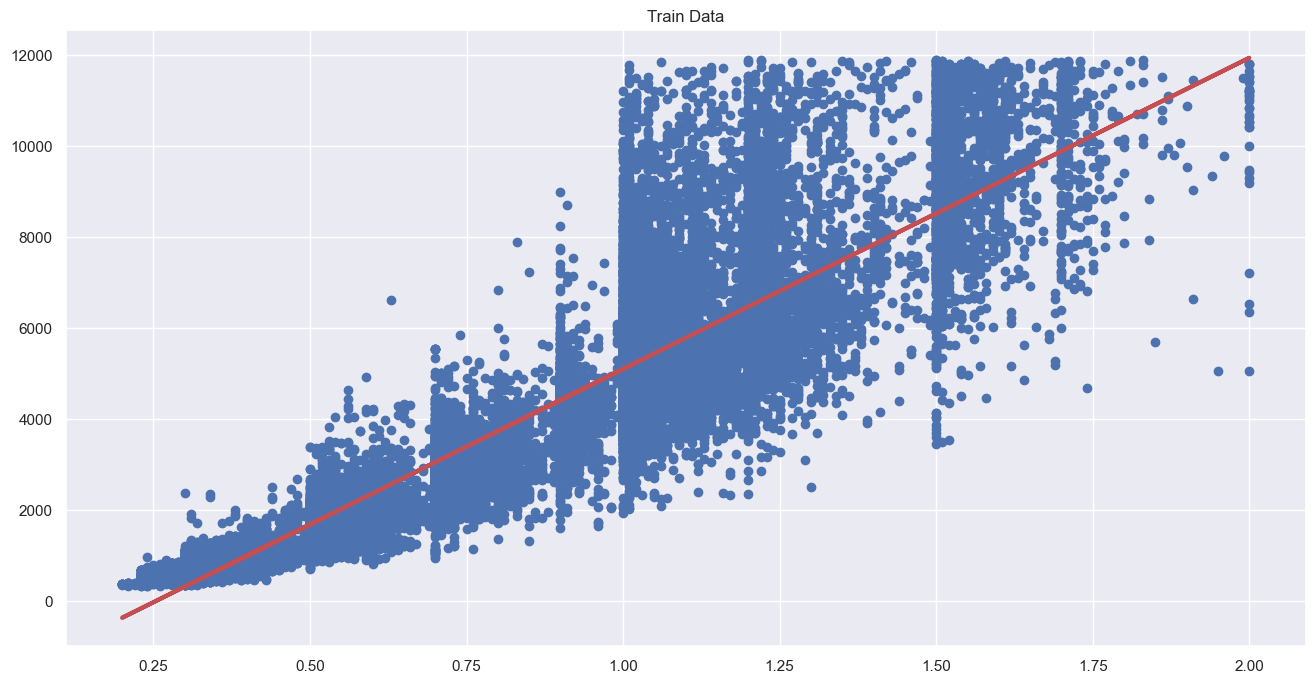

Explained Variance (R^2) 	: 0.852749870478203
Mean Squared Error (MSE) 	: 1117453.6236266212
Root Mean Squared Error (RMSE) 	: 1057.0967900938026


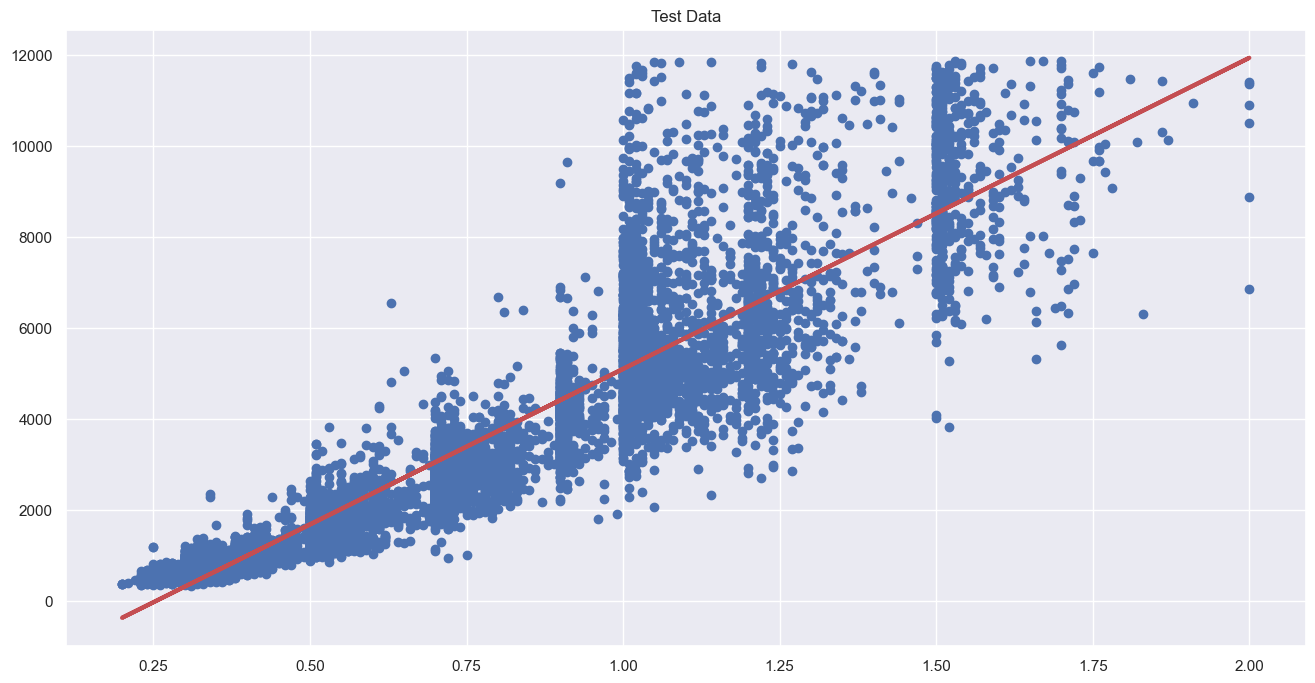

Explained Variance (R^2) 	: 0.8474300745340442
Mean Squared Error (MSE) 	: 1134893.7347619676
Root Mean Squared Error (RMSE) 	: 1065.313913718378


In [26]:
# Extract Response and Predictors
y = pd.DataFrame(diamondtarget['PRICE'])
X = pd.DataFrame(diamondtarget['CARAT'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 138)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

linreg.fit(X_train, y_train)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.title("Train Data")
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

# Compute RMSE on the train set
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))

# Predict Price values corresponding to Carat
y_test_pred = linreg.predict(X_test)

# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.title("Test Data")
plt.scatter(X_test, y_test)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))

# Compute MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

# Compute RMSE on the test set
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

Train Set : (38032, 1) (38032, 1)
Test Set  : (9508, 1) (9508, 1)
Intercept 	: b =  [2048.23382481]
Coefficients 	: a =  [[17.15843893]]


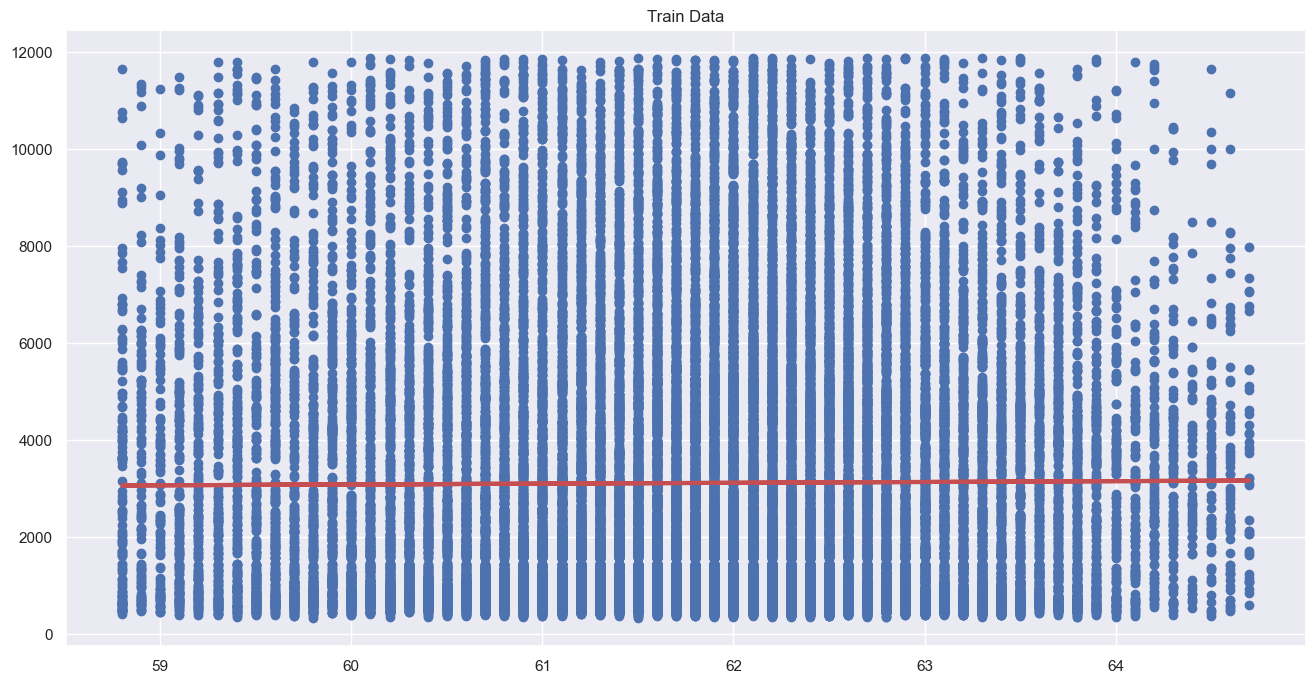

Explained Variance (R^2) 	: 4.7179779373629493e-05
Mean Squared Error (MSE) 	: 7588454.462077691
Root Mean Squared Error (RMSE) 	: 2754.714951147884


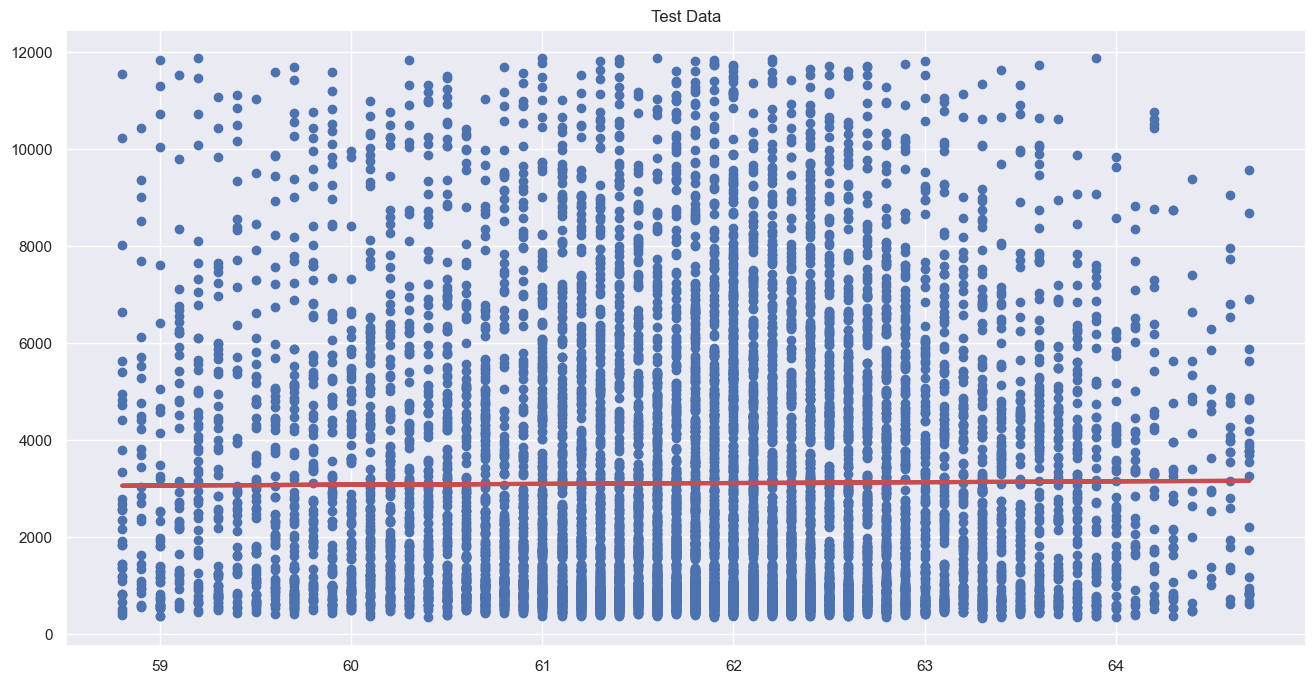

Explained Variance (R^2) 	: -1.078043204594259e-05
Mean Squared Error (MSE) 	: 7438595.555059084
Root Mean Squared Error (RMSE) 	: 2727.378879997989


In [27]:
# Extract Response and Predictors
y = pd.DataFrame(diamondtarget['PRICE'])
X = pd.DataFrame(diamondtarget['DEPTH'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 138)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

linreg.fit(X_train, y_train)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.title("Train Data")
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

# Compute RMSE on the train set
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))

# Predict Price values corresponding to Carat
y_test_pred = linreg.predict(X_test)

# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.title("Test Data")
plt.scatter(X_test, y_test)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))

# Compute MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

# Compute RMSE on the test set
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

Train Set : (38032, 1) (38032, 1)
Test Set  : (9508, 1) (9508, 1)
Intercept 	: b =  [-7197.82063453]
Coefficients 	: a =  [[180.00235371]]


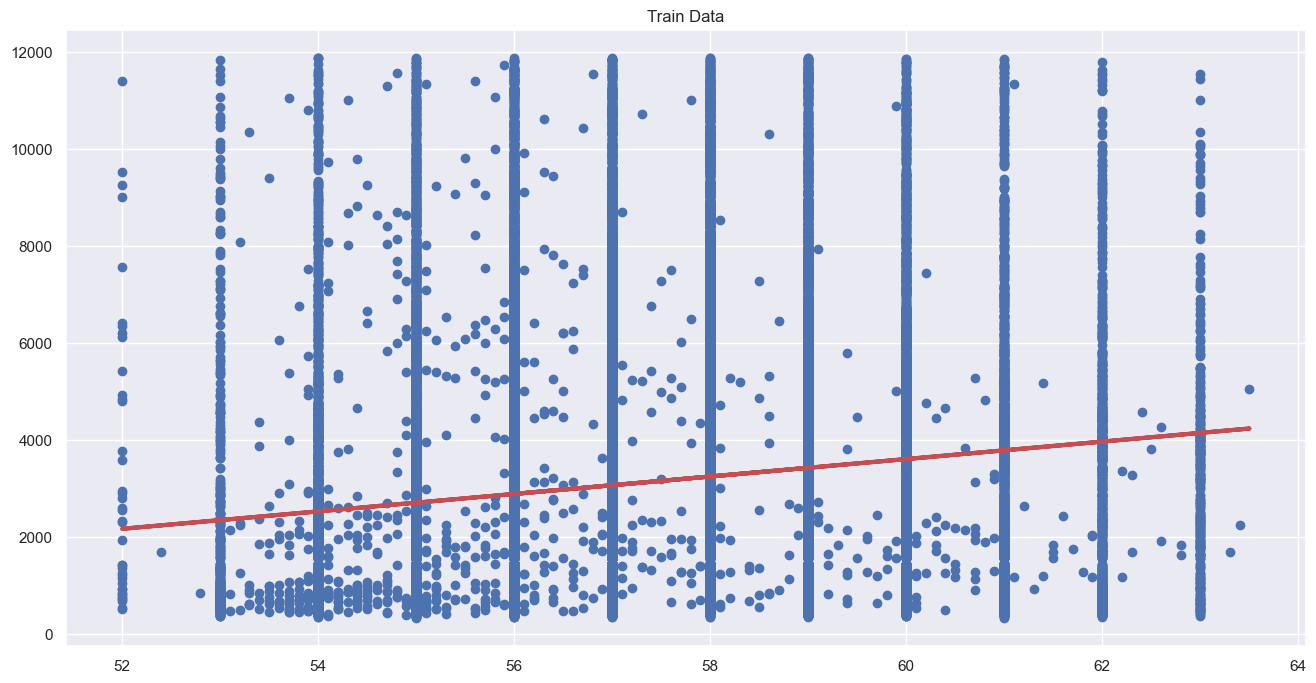

Explained Variance (R^2) 	: 0.01741500024526177
Mean Squared Error (MSE) 	: 7456653.329018379
Root Mean Squared Error (RMSE) 	: 2730.687336371262


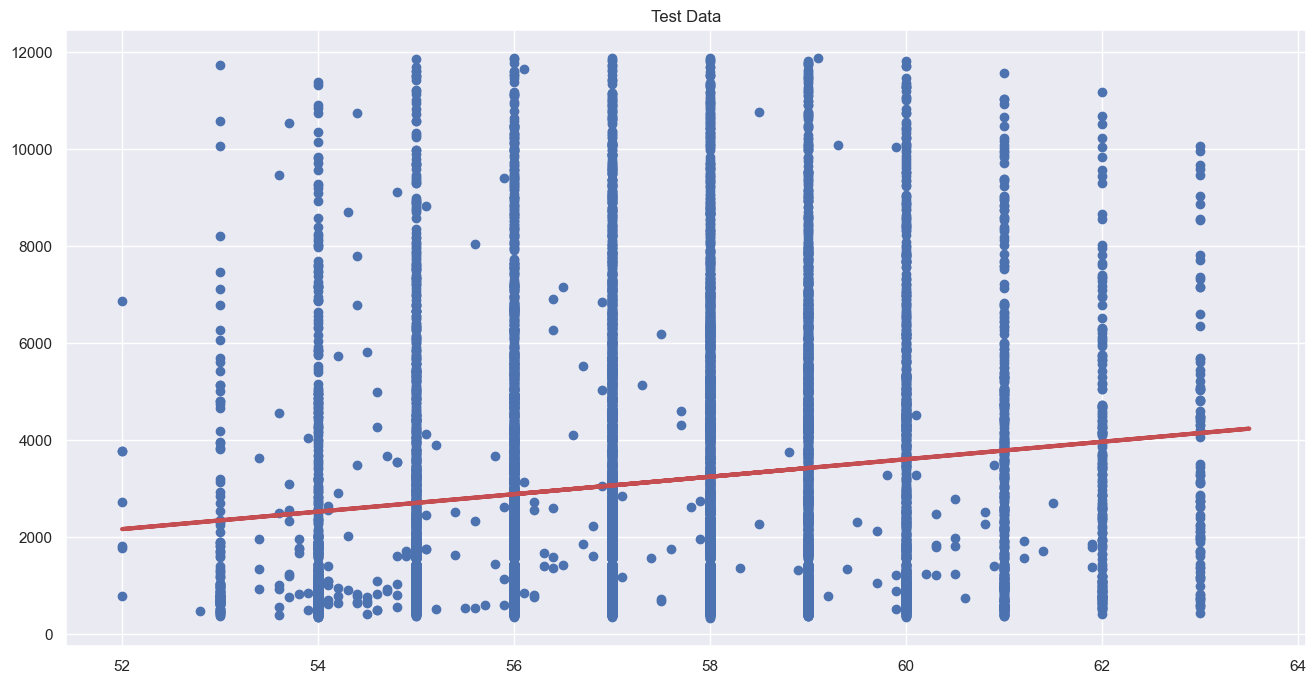

Explained Variance (R^2) 	: 0.023849313458281896
Mean Squared Error (MSE) 	: 7261111.880053896
Root Mean Squared Error (RMSE) 	: 2694.645037858214


In [28]:
# Extract Response and Predictors
y = pd.DataFrame(diamondtarget['PRICE'])
X = pd.DataFrame(diamondtarget['TABLE'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 138)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

linreg.fit(X_train, y_train)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.title("Train Data")
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

# Compute RMSE on the train set
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))

# Predict Price values corresponding to Carat
y_test_pred = linreg.predict(X_test)

# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.title("Test Data")
plt.scatter(X_test, y_test)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))

# Compute MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

# Compute RMSE on the test set
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

### We can conclude that DEPTH and TABLE has close to no correlation to PRICE. Thus, CARAT is the only suitable numerical variable we can use to predict PRICE.

## Decision Tree Regression

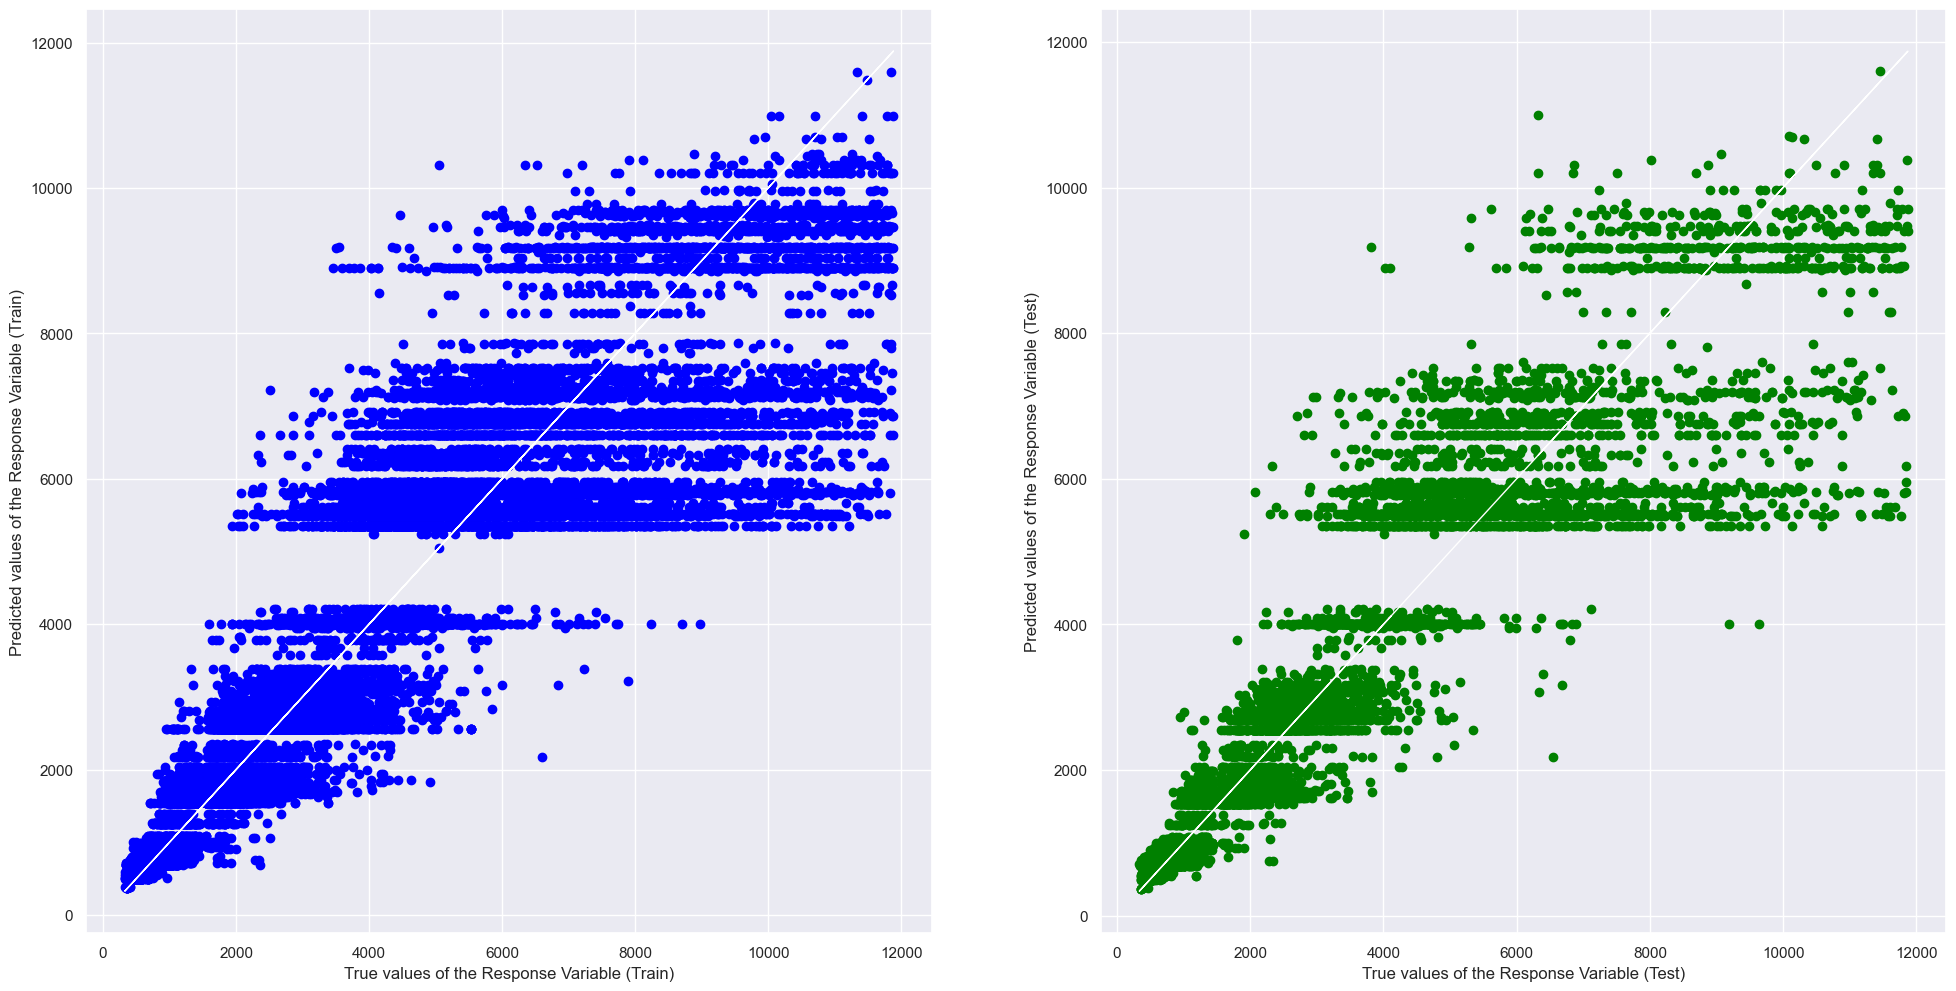

In [29]:
# Extract Response and Predictors
y = pd.DataFrame(diamondtarget['PRICE'])
X = pd.DataFrame(diamondtarget['CARAT'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 138)

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
DecisionTreeRegressor()
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [30]:
print("Explained Variance (R^2) on Train Set \t:", regressor.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) on Train Set \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Explained Variance (R^2) on Test Set \t:", regressor.score(X_test, y_test))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) on Test Set \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

Explained Variance (R^2) on Train Set 	: 0.8697151492326016
Mean Squared Error (MSE) on Train Set 	: 988707.3041394651
Root Mean Squared Error (RMSE) on Train Set 	: 994.3376208006339
Explained Variance (R^2) on Test Set 	: 0.8621940177554098
Mean Squared Error (MSE) on Test Set 	: 1025071.9162670241
Root Mean Squared Error (RMSE) on Test Set 	: 1012.4583528555751


C:\Users\moham\AppData\Local\Temp\ipykernel_18764\993329158.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regress.fit(X_train, y_train)


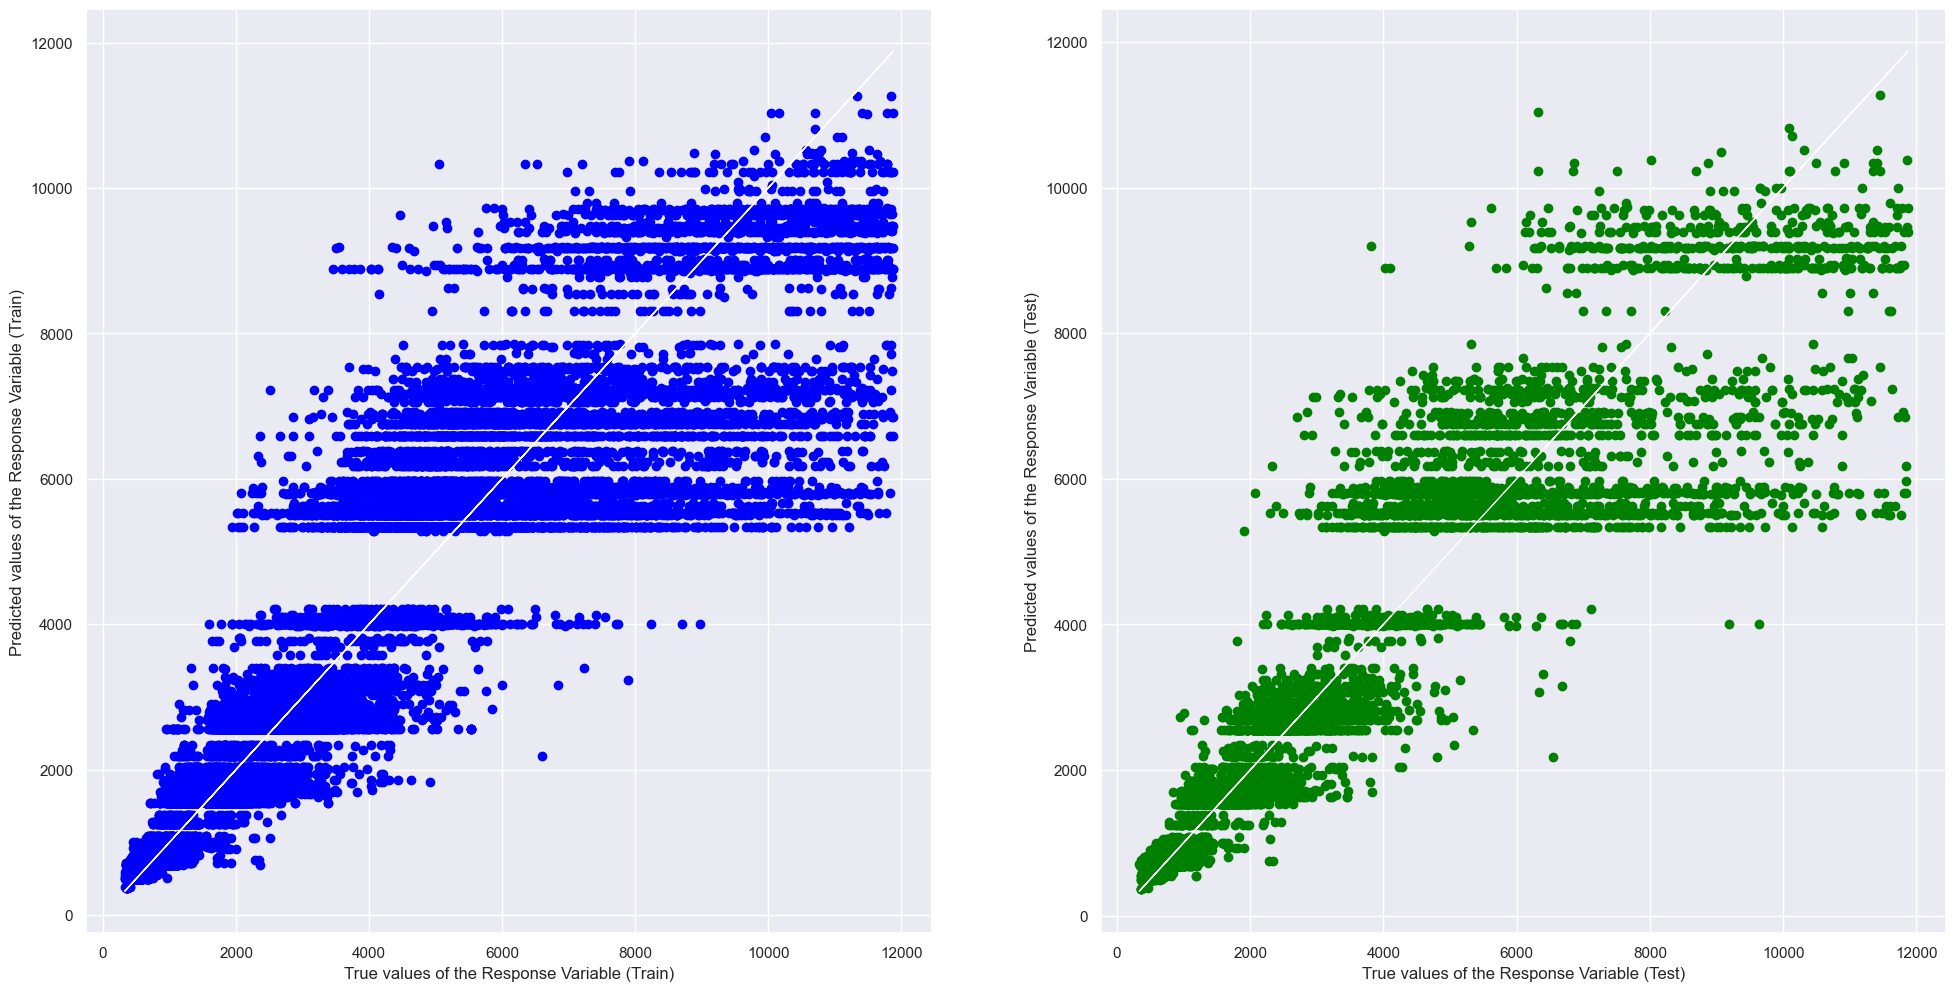

In [31]:
# Extract Response and Predictors
y = pd.DataFrame(diamondtarget['PRICE'])
X = pd.DataFrame(diamondtarget['CARAT'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 138)

regress = RandomForestRegressor()
regress.fit(X_train, y_train)

y_train_pred = regress.predict(X_train)
y_test_pred = regress.predict(X_test)


f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [32]:
print("Explained Variance (R^2) on Train Set \t:", regress.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) on Train Set \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Explained Variance (R^2) on Test Set \t:", regress.score(X_test, y_test))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) on Test Set \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

Explained Variance (R^2) on Train Set 	: 0.8696767461579404
Mean Squared Error (MSE) on Train Set 	: 988998.7378725141
Root Mean Squared Error (RMSE) on Train Set 	: 994.48415667245
Explained Variance (R^2) on Test Set 	: 0.8621856708870331
Mean Squared Error (MSE) on Test Set 	: 1025134.0045756906
Root Mean Squared Error (RMSE) on Test Set 	: 1012.4890145456842


#### Decision Tree Regression Model has the best Explained Variance (R^2) and minimum MSE on the test sets compared to Linear Regression Model and Random Forest Regression Model.
#### Therefore, Decision Tree Regression Model is the most suitable option in predicting the price of a diamond using carat.

### Analysis of Categorical Variables

In [33]:
#Extraction of categorical variables
diamondcatdata = pd.DataFrame(diamonddata_clean[['CUT', 'COLOR', 'CLARITY']])
diamondcatdata.head()

,CUT,COLOR,CLARITY
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [34]:
diamondcatdata.describe()

,CUT,COLOR,CLARITY
count,53943,53943,53943
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13067


In [35]:
diamondcatdata["CLARITY"].nunique()

8

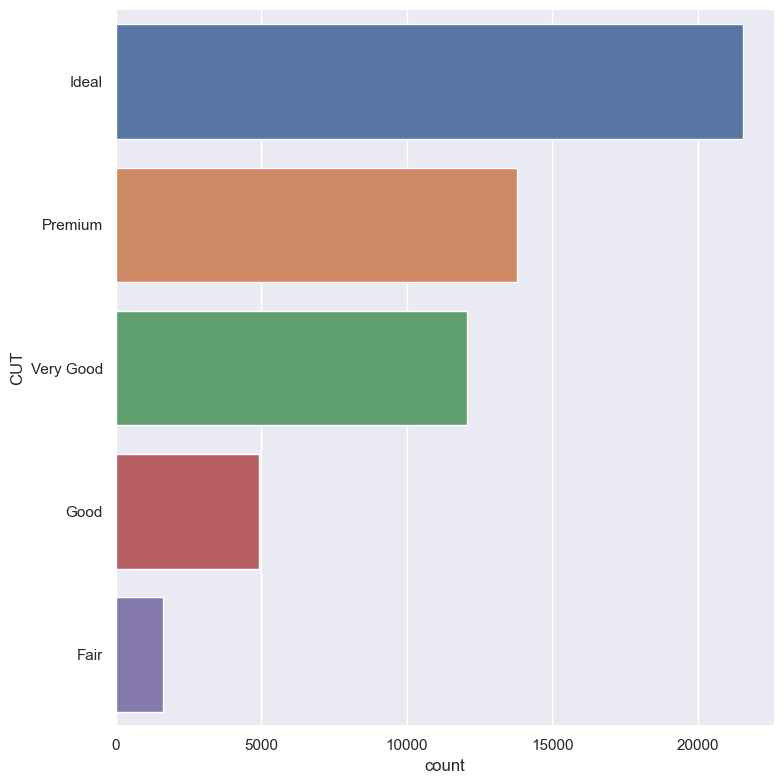

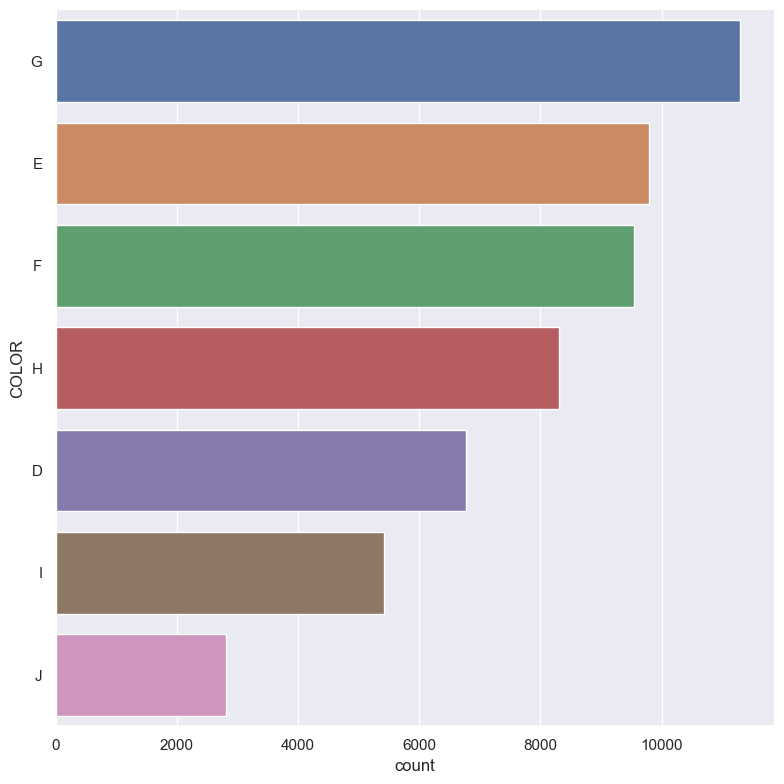

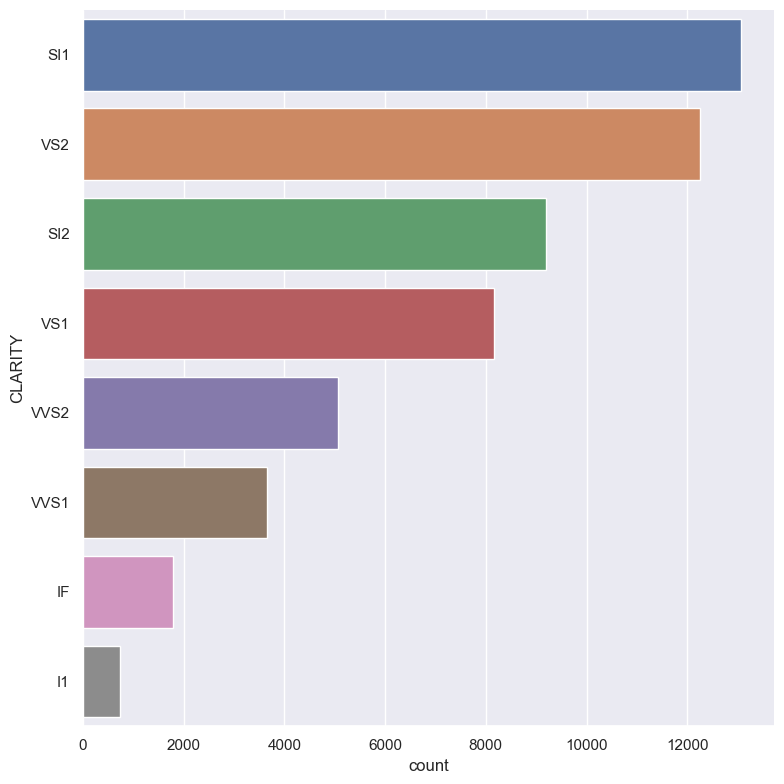

In [36]:
#Catplot for Cut
sb.catplot(y = 'CUT', data = diamondcatdata, 
           kind = "count", 
           height = 8, 
           order = diamondcatdata['CUT'].value_counts().index)

#Catplot for Color
sb.catplot(y = 'COLOR', data = diamondcatdata, 
           kind = "count", 
           height = 8, 
           order = diamondcatdata['COLOR'].value_counts().index)

#Catplot for Clarity
sb.catplot(y = 'CLARITY', data = diamondcatdata, 
           kind = "count", 
           height = 8, 
           order = diamondcatdata['CLARITY'].value_counts().index)

In [37]:
# Add Price to the dataframe
diamondcatdata = pd.concat([diamondcatdata, diamonddata_clean["PRICE"]], axis = 1).reindex(diamondcatdata.index)
diamondcatdata.head()

,CUT,COLOR,CLARITY,PRICE
0,Ideal,E,SI2,326
1,Premium,E,SI1,326
2,Good,E,VS1,327
3,Premium,I,VS2,334
4,Good,J,SI2,335


<AxesSubplot:xlabel='CLARITY', ylabel='PRICE'>

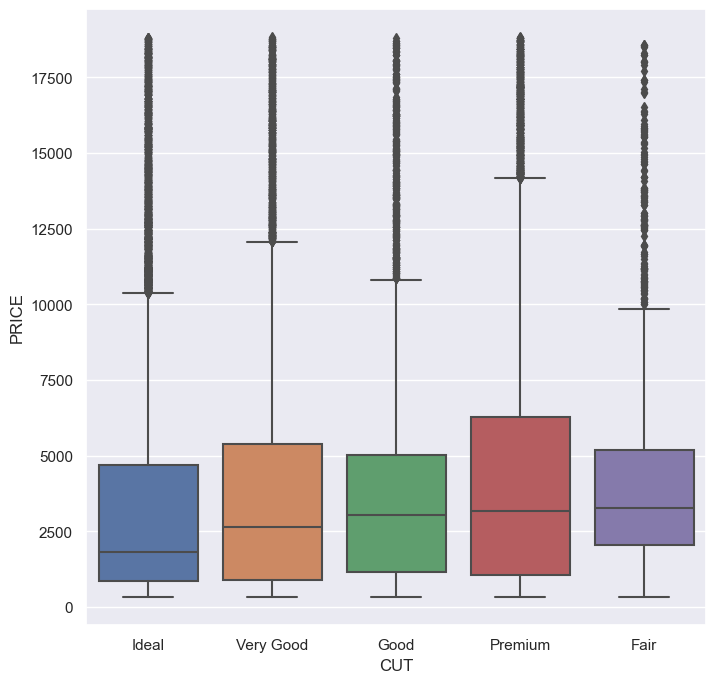

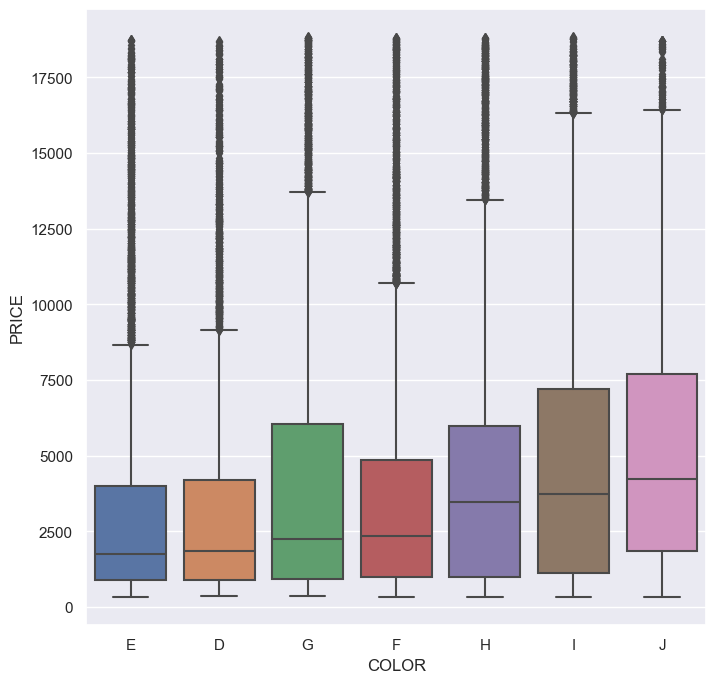

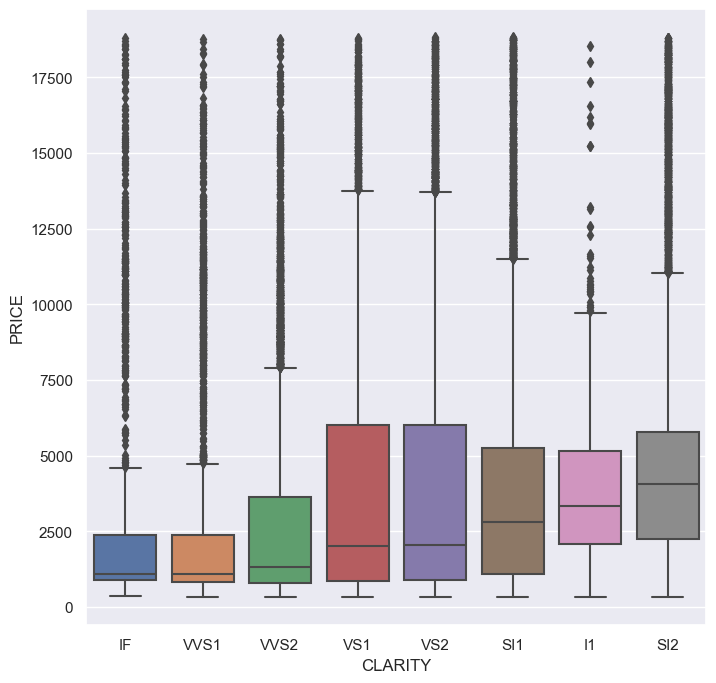

In [38]:
# Group Price by the categorical variable to find the medians for each boxplot above and sort accordingly
f = plt.figure(figsize=(8, 8))
sb.boxplot(x = 'CUT', y = 'PRICE', data = diamondcatdata, 
           order = diamondcatdata.groupby('CUT')['PRICE'].median().sort_values().index)

f = plt.figure(figsize=(8, 8))
sb.boxplot(x = 'COLOR', y = 'PRICE', data = diamondcatdata, 
           order = diamondcatdata.groupby('COLOR')['PRICE'].median().sort_values().index)

f = plt.figure(figsize=(8, 8))
sb.boxplot(x = 'CLARITY', y = 'PRICE', data = diamondcatdata, 
           order = diamondcatdata.groupby('CLARITY')['PRICE'].median().sort_values().index)

COLOR and CLARITY : Moderately important variables : High variation in Price boxplots across levels

CUT : Not clear if important as a variable at all : Not much variation in Price boxplots across the categorical levels

Just from the above information, we would pick COLOR and CLARITY as the two potential individual predictors.

### Conclusion

Based of our analysis using various models, for numerical variables, Carat is the best predictor for predicting the price of diamond as it shows a very high correlation with price. The best regression model to use to predict price using carat is Decision Tree Regression Model.

As for categorical variables, Color and Clarity are the two potential variables for predicting the price of diamond as they have the most strong relations with price. 